# Interaction potential

What is the interaction potential between two particles? Does it reproduces the results of Osterman (PRL 2007)? 

What does the potential look like if particles have parallel moments?

In [10]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import trackpy as tp

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [187]:
temp = 300 # K
Kb = 4/300 # pN nm / K
diffusion = 0.1e6 #nm^2/s
drag = Kb*temp/diffusion #pN/(nm/s)

sgm = 2.8 #um
B = 3 #mT
chi = 0.5 #n.a.

initial_positions = np.array([[-1.41,0,0.1],[1.41,0,-0.1]])

sim = lmp.sim(initial_positions,
              magnitude = B,
              radius = sgm/2,
              drag = drag,
              frequency=1,
              susceptibility = chi,
              angle=0,
              lj_parameters=[1,1/(2**(1/6))],
              lj_cutoff = 1,
              framerate=1e1,
              timestep=1e-4,
              total_time = 10,
              walls = [-10/2,10/2],
              temperature = 1)

$$ F = -\nabla U$$
$$ U(\vec{r}) = -\int_{\infty}^\vec{r} F.\mathrm{d}\vec{s}$$

In [188]:
def integrate(f,x):
    f = f.values
    x = x.values
    f01 = (f[1:]+f[:-1])/2
    dx = x[1:]-x[:-1]
    return np.cumsum(f01*dx)

def potential(F,r):
    U = -(integrate(F.fx,r.x) + integrate(F.fy,r.y) + integrate(F.fz,r.z))
    r = np.sqrt(r.x**2+r.y**2).values
    r = (r[1:]+r[:-1])/2
    return U, r

In [209]:
Z = np.linspace(0,2.5,5)
N = 1000
U = np.empty([N,np.size(Z)])
R = np.empty([N,np.size(Z)])

for i,z in enumerate(Z):
    trj = sim.generate_interaction_series([10,0,z],1000,[0,0,z])
    idx = pd.IndexSlice
    u, r = potential(trj.loc[idx[:,1],('fx','fy','fz')],trj.loc[idx[:,1],('x','y','z')])    
    U[:,i] = u
    R[:,i] = r

lmp_mingw64.exe -in test.lmpfieldin
lmp_mingw64.exe -in test.lmpfieldin
lmp_mingw64.exe -in test.lmpfieldin
lmp_mingw64.exe -in test.lmpfieldin
lmp_mingw64.exe -in test.lmpfieldin


if we define (from Osterman 2007):
$$ K = \frac{\pi \sigma^6 \chi^2 B^2}{144\mu_0}$$

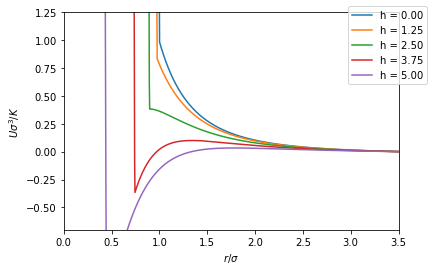

In [222]:
K = (np.pi * (sgm**6) * chi**2 * (B*1e6)**2) / (144 * np.pi*4e14)

plt.plot(R/sgm,U*(sgm**3)/K)
plt.ylim([-0.7,1.25])
plt.xlim([0,3.5])
plt.legend(["h = %2.2f"%(i*2) for i in Z],bbox_to_anchor=(1.1, 1.05))
plt.xlabel("$r/\sigma$")
plt.ylabel("$U\sigma^3/K$")

And from Dobnikar 2008: 

<img src=Dobnikar_Potential.png width=500px>